In [ ]:
#https://stackoverflow.com/questions/7878398/how-to-extract-an-arbitrary-line-of-values-from-a-numpy-array


import numpy as np
import matplotlib.pyplot as plt
import read_cubes
import scipy.ndimage

path = "/var/lib/libvirt/images/nbody/baorsd/run101/density_field/S020_CIC1024_conf.bin"



In [10]:
cube = read_cubes.read(path)

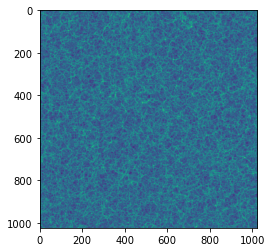

In [11]:
plt.imshow(np.log(cube[0:5,:,:].mean(0)+1))

In [12]:
test = np.ones((4,4,4))

In [13]:
test[0,:,:]=0 

In [14]:
x0 , y0, z0 = 0, 0, 0

In [15]:
x1,y1,z1 = 2,2,2

In [16]:
num = 10
x, y, z = np.linspace(x0, x1, num), np.linspace(y0, y1, num), np.linspace(z0, z1, num)


In [17]:
np.vstack((x,y,z))

array([[0.        , 0.22222222, 0.44444444, 0.66666667, 0.88888889,
        1.11111111, 1.33333333, 1.55555556, 1.77777778, 2.        ],
       [0.        , 0.22222222, 0.44444444, 0.66666667, 0.88888889,
        1.11111111, 1.33333333, 1.55555556, 1.77777778, 2.        ],
       [0.        , 0.22222222, 0.44444444, 0.66666667, 0.88888889,
        1.11111111, 1.33333333, 1.55555556, 1.77777778, 2.        ]])

In [18]:
zi = scipy.ndimage.map_coordinates(np.transpose(test), np.vstack((x,y,z)), order=0, mode='nearest')

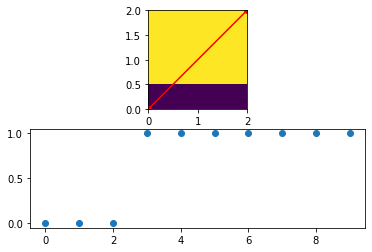

In [19]:
fig, axes = plt.subplots(nrows=2)
axes[0].imshow(test[:,0,:],origin="lower",extent=[0,2,0,2])
axes[0].plot([x0, x1], [y0, y1], 'ro-')
axes[0].axis('image')

axes[1].scatter(range(num),zi)

plt.show()

In [20]:
res = 2 #Mpc/h

In [21]:
start_point = np.array([0,90,100]) #Mpc/h
end_point = np.array([500,90,100]) #Mpc/h
start_grid = (start_point/res).astype(np.int32)
end_grid = (end_point/res).astype(np.int32)
num = 250
XYZ = np.linspace(start_grid, end_grid, num)
zi = scipy.ndimage.map_coordinates(cube, XYZ.T, order=0, mode='nearest')

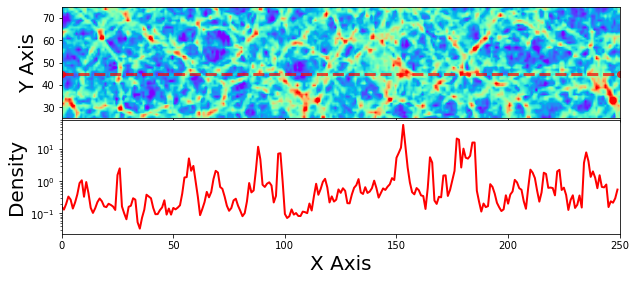

In [22]:
fig, axes = plt.subplots(nrows=2,figsize=(10,4.2),sharex=True)
s = np.log(cube[:,:,50]+1)
axes[0].imshow(s.T,vmin=-3,vmax=3,origin="lower",aspect="equal", interpolation="bilinear", extent=[0,1024,0,1024],cmap="rainbow")
axes[0].plot([start_grid[0], end_grid[0]], [start_grid[1], end_grid[1]], 'ro--',lw=3,alpha=0.7)
axes[0].set_xlim(0,250)
axes[0].set_ylim(25,75)
axes[0].set_aspect('equal')
axes[0].set_ylabel("Y Axis",fontsize=20)




axes[1].plot(zi+1,color="red",lw=2)
axes[1].semilogy()
axes[1].set_xlabel("X Axis",fontsize=20)
axes[1].set_ylabel("Density",fontsize=20)
axes[1].set_aspect('auto')

plt.subplots_adjust(hspace = .001)
#plt.savefig("sightlines.pdf",dpi=100)
plt.show()

In [23]:
dist = np.sqrt(((end_point - start_point)**2).sum())

In [24]:
dist

500.0

In [25]:
500*np.sqrt(3)

866.0254037844386

In [26]:
zi.sum()/num

0.5274039306640625

In [32]:
from sight_line_constructor import Sightline

In [33]:
s1 = Sightline(start_point,end_point)

In [34]:
s1.num

1000

In [35]:
s1.r

0

In [31]:
s1.calc_los( 2,cube)

RuntimeError: invalid shape for coordinate array